# Import Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from catboost import CatBoostRegressor # type: ignore
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#for ignore the warnings
import warnings
warnings.filterwarnings("ignore")




In [25]:
# !pip install catboost

In [26]:

df = pd.read_csv("data/stud.csv")

df['total_score'] = df['reading_score'] + df['math_score'] + df['reading_score']

df['average_score'] = round(df['total_score'] /3,2)
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,216,72.0
1,female,group C,some college,standard,completed,69,90,88,249,83.0


# Predict the total score

In [27]:
X= df.drop(columns =['total_score'], axis = 1)
X.shape

(1000, 9)

In [28]:
y= df['total_score']
y.shape

(1000,)

# Transformation of columns

In [29]:
num_col = X.select_dtypes(exclude ='object').columns
cat_col = X.select_dtypes(include= 'object').columns

In [30]:

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder ", oh_transformer, cat_col),
        ("StandardScaler", numeric_transformer, num_col)
    ]
)

# Apply on the X dataset
X = preprocessor.fit_transform(X)




In [31]:
X.shape

(1000, 21)

In [37]:
preprocessor.get_feature_names_out()

array(['OneHotEncoder __gender_female', 'OneHotEncoder __gender_male',
       'OneHotEncoder __race_ethnicity_group A',
       'OneHotEncoder __race_ethnicity_group B',
       'OneHotEncoder __race_ethnicity_group C',
       'OneHotEncoder __race_ethnicity_group D',
       'OneHotEncoder __race_ethnicity_group E',
       "OneHotEncoder __parental_level_of_education_associate's degree",
       "OneHotEncoder __parental_level_of_education_bachelor's degree",
       'OneHotEncoder __parental_level_of_education_high school',
       "OneHotEncoder __parental_level_of_education_master's degree",
       'OneHotEncoder __parental_level_of_education_some college',
       'OneHotEncoder __parental_level_of_education_some high school',
       'OneHotEncoder __lunch_free/reduced',
       'OneHotEncoder __lunch_standard',
       'OneHotEncoder __test_preparation_course_completed',
       'OneHotEncoder __test_preparation_course_none',
       'StandardScaler__math_score', 'StandardScaler__reading_sc

# Split the dataset into train and test

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [39]:
print("Train shape", X_train.shape, y_train.shape)
print("Test shape", X_test.shape, y_test.shape)

Train shape (800, 21) (800,)
Test shape (200, 21) (200,)


In [44]:
# Function for evaluation code

def evaluate_model(true, predicted):
    mae= mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r_squared = r2_score(true, predicted)
    return mae,  rmse, r_squared 


In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose = False),
    "AdaBoost Regressor": AdaBoostRegressor()

}

model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    
    model_train_mae , model_train_rmse, model_train_r_squared = evaluate_model(y_train,y_train_pred)
    model_test_mae , model_test_rmse, model_test_r_squared = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Prediction for Training set")
    print(" MAE: {:.4f}".format(model_train_mae))
    print(" RMSE: {:.4f}".format(model_train_rmse))
    print(" R Squared: {:.4f}".format(model_train_r_squared))

    print("----------------------------------------------")

    print("Model Prediction for Test set")
    print(" MAE: {:.4f}".format(model_test_mae))
    print(" RMSE: {:.4f}".format(model_test_rmse))
    print(" R Squared: {:.4f}".format(model_test_r_squared))
    r2_list.append(model_test_r_squared)

    print('#'*45)
    print('\n')




    

Linear Regression
Model Prediction for Training set
 MAE: 0.0000
 RMSE: 0.0000
 R Squared: 1.0000
----------------------------------------------
Model Prediction for Test set
 MAE: 0.0000
 RMSE: 0.0000
 R Squared: 1.0000
#############################################


Lasso
Model Prediction for Training set
 MAE: 0.8091
 RMSE: 1.0103
 R Squared: 0.9994
----------------------------------------------
Model Prediction for Test set
 MAE: 0.8504
 RMSE: 1.0629
 R Squared: 0.9994
#############################################


Ridge
Model Prediction for Training set
 MAE: 0.0683
 RMSE: 0.0840
 R Squared: 1.0000
----------------------------------------------
Model Prediction for Test set
 MAE: 0.0781
 RMSE: 0.0967
 R Squared: 1.0000
#############################################


K-Neighbors Regressor
Model Prediction for Training set
 MAE: 4.9125
 RMSE: 6.2935
 R Squared: 0.9776
----------------------------------------------
Model Prediction for Test set
 MAE: 6.2590
 RMSE: 8.7383
 R Squared:

In [53]:
r2_list

[1.0,
 0.9994125177689851,
 0.9999951329806348,
 0.9602957810348031,
 0.9985232683254212,
 0.9971216349561939,
 0.9983007279818399,
 0.9951799975586907,
 0.9934687214333147]

In [54]:
pd.DataFrame(list(zip(model_list, r2_list)),columns = ['Model Name', 'R2_Score'] ).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999995
1,Lasso,0.999413
4,Decision Tree,0.998523
6,XGB Regressor,0.998301
5,Random Forest Regressor,0.997122
7,CatBoost Regressor,0.995180
8,AdaBoost Regressor,0.993469
3,K-Neighbors Regressor,0.960296


In [58]:
# Linear model showing highest r2 will go with that and predict it seprately

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of Linear regression Model is %.2f"%score)

Accuracy of Linear regression Model is 100.00


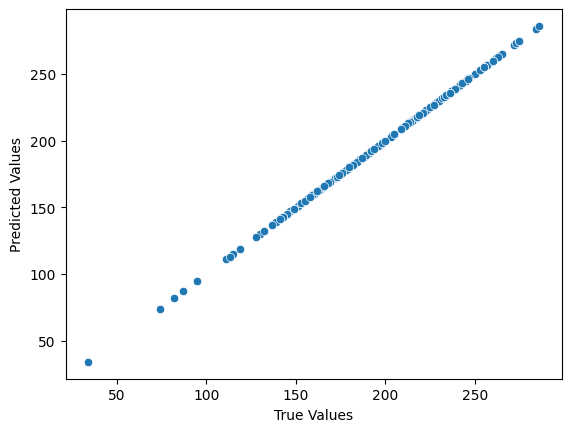

In [61]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

<Axes: xlabel='total_score'>

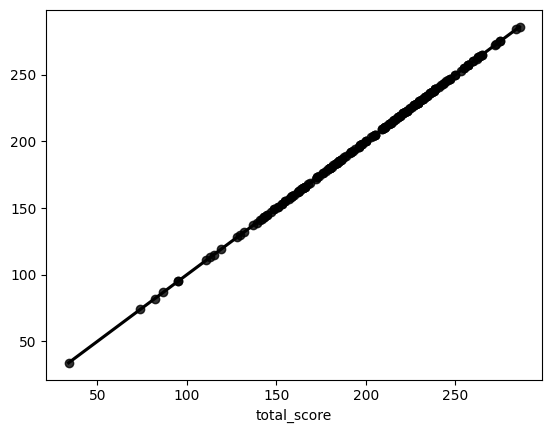

In [66]:
sns.regplot(x=y_test, y=y_pred,color='black')

In [68]:
#Difference bt actaul and predictd

pred_df = pd.DataFrame({'Actual Value': y_test,
                        'Predicted Values': y_test ,
                        'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Values,Difference
521,263,263,-5.684342e-14
737,185,185,2.842171e-14
740,226,226,0.000000e+00
660,228,228,-2.842171e-14
411,250,250,-2.842171e-14
...,...,...,...
408,166,166,5.684342e-14
332,174,174,5.684342e-14
208,236,236,0.000000e+00
613,219,219,0.000000e+00
